**Medicine Prediction System for Health Issues**

In [114]:
#Importing necessary Libraries:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer, TfidfTransformer
from sklearn.metrics.pairwise import linear_kernel
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,multilabel_confusion_matrix, classification_report

**Data Handling and Data Preprocessing**

In [115]:
#This is the data we are going to use to develop a classifier for prediction of medicine:
#Description of the Medicines:
df = pd.read_excel('Medicine_description.xlsx')
print(df.shape)
df.head()

(22481, 3)


,Drug_Name,Reason,Description
0,A CN Gel(Topical) 20gmA CN Soap 75gm,Acne,Mild to moderate acne (spots)
1,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,Acne,A RET 0.025% is a prescription medicine that i...
2,ACGEL CL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
3,ACGEL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
4,Acleen 1% Lotion 25ml,Acne,treat the most severe form of acne (nodular ac...


Dataset has 22479 unique Medicine Names
And the top 5 counts are :
M Cold Plus CZ Tablet 10'S                              2
Gefer Capsule 10'S                                      2
A CN Gel(Topical) 20gmA CN Soap 75gm                    1
Doloban SR 100mg Tablet 10'S                            1
Dolochek 200mg Tablet 10'SDolochek 100mg Tablet 10'S    1
Name: Drug_Name, dtype: int64


([0, 1, 2, 3, 4],
 [Text(0, 0, "M Cold Plus CZ Tablet 10'S"),
  Text(1, 0, "Gefer Capsule 10'S"),
  Text(2, 0, 'A CN Gel(Topical) 20gmA CN Soap 75gm'),
  Text(3, 0, "Doloban SR 100mg Tablet 10'S"),
  Text(4, 0, "Dolochek 200mg Tablet 10'SDolochek 100mg Tablet 10'S")])

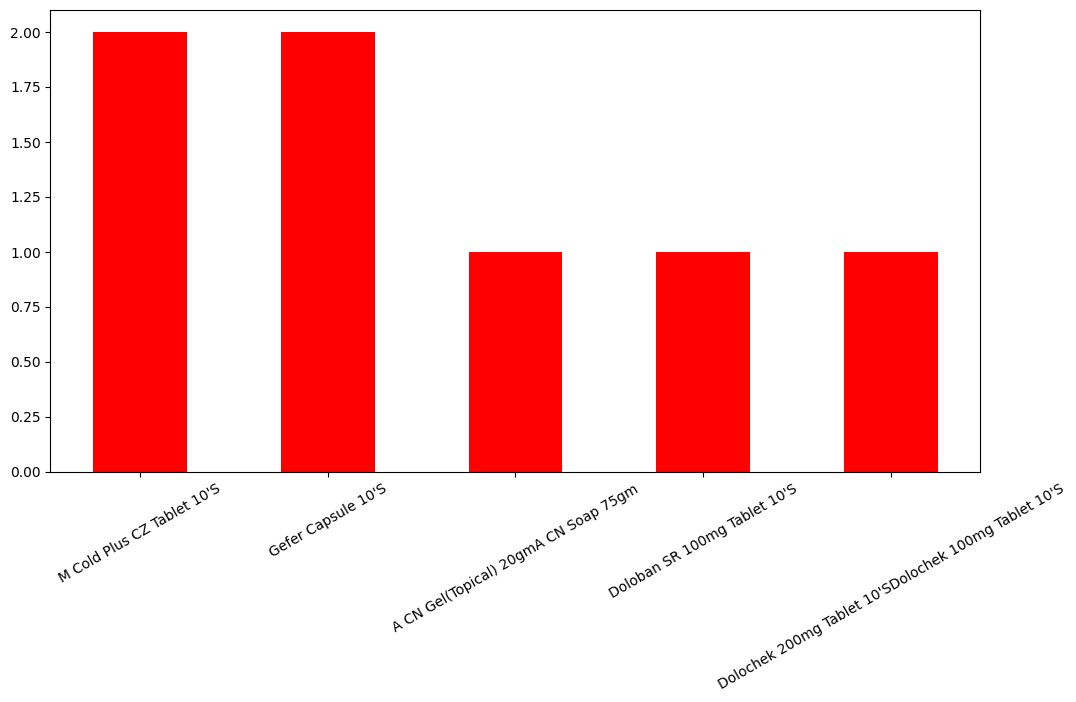

In [116]:
#Unique Medicine Descriptions:
print(f'Dataset has {len(df.Drug_Name.unique())} unique Medicine Names')
print(f'And the top 5 counts are :')
print(df.Drug_Name.value_counts().head(5))

count = df.Drug_Name.value_counts().head(5)
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.bar(count.index, count.values, width=0.5, color='red')
plt.xticks(rotation=30)

Dataset has 51 unique Reasons
And the top 5 counts are :
Supplement      3913
Pain            2852
Infection       2629
Hypertension    2505
Diabetes        2013
Name: Reason, dtype: int64


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Supplement'),
  Text(1, 0, 'Pain'),
  Text(2, 0, 'Infection'),
  Text(3, 0, 'Hypertension'),
  Text(4, 0, 'Diabetes')])

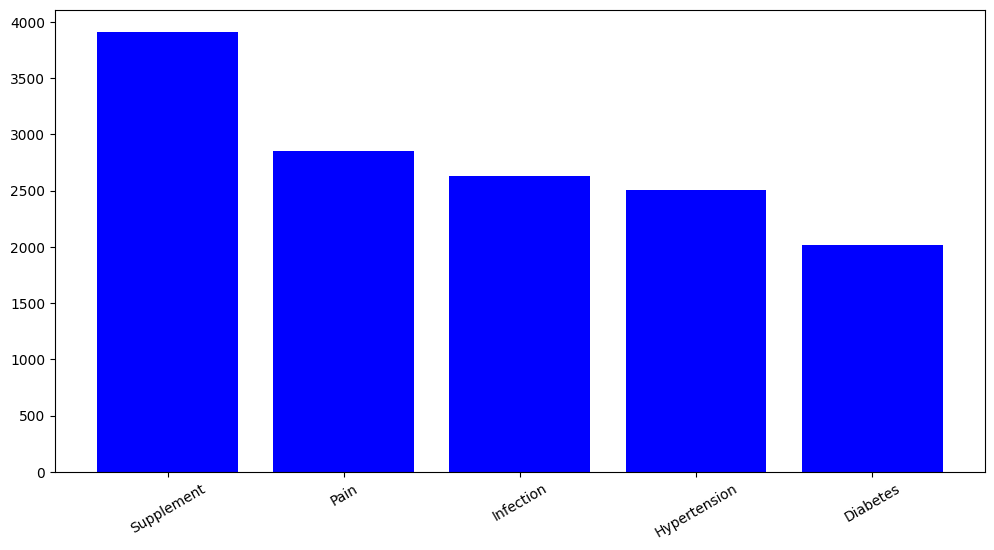

In [117]:
print(f'Dataset has {len(df.Reason.unique())} unique Reasons')
print(f'And the top 5 counts are :')
print(df.Reason.value_counts().head(5))

count = df.Reason.value_counts().head(5)
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.bar(count.index, count.values, width=0.8, color='blue')
plt.xticks(rotation=30)

Dataset has 301 unique Medicine Descriptions
And the top 5 counts are :
treat type 2 diabetes mellitus when diet, physical exercise and weight reduction alone have not been able to control your blood sugar levels    671
reduces the diabetes                                                                                                                            671
reduces sugar level diabetes                                                                                                                    671
lower chance of stroke in patients with high blood pressure and a heart problem called left ventricular hypertrophy (LVH)                       578
lower high blood pressure (hypertension)                                                                                                        578
Name: Description, dtype: int64


([0, 1, 2, 3, 4],
 [Text(0, 0, 'treat type 2 diabetes mellitus when diet, physical exercise and weight reduction alone have not been able to control your blood sugar levels'),
  Text(1, 0, 'reduces the diabetes'),
  Text(2, 0, 'reduces sugar level diabetes'),
  Text(3, 0, 'lower\xa0chance of stroke in patients with high blood pressure and a heart problem called left ventricular hypertrophy (LVH)'),
  Text(4, 0, 'lower high blood pressure (hypertension)')])

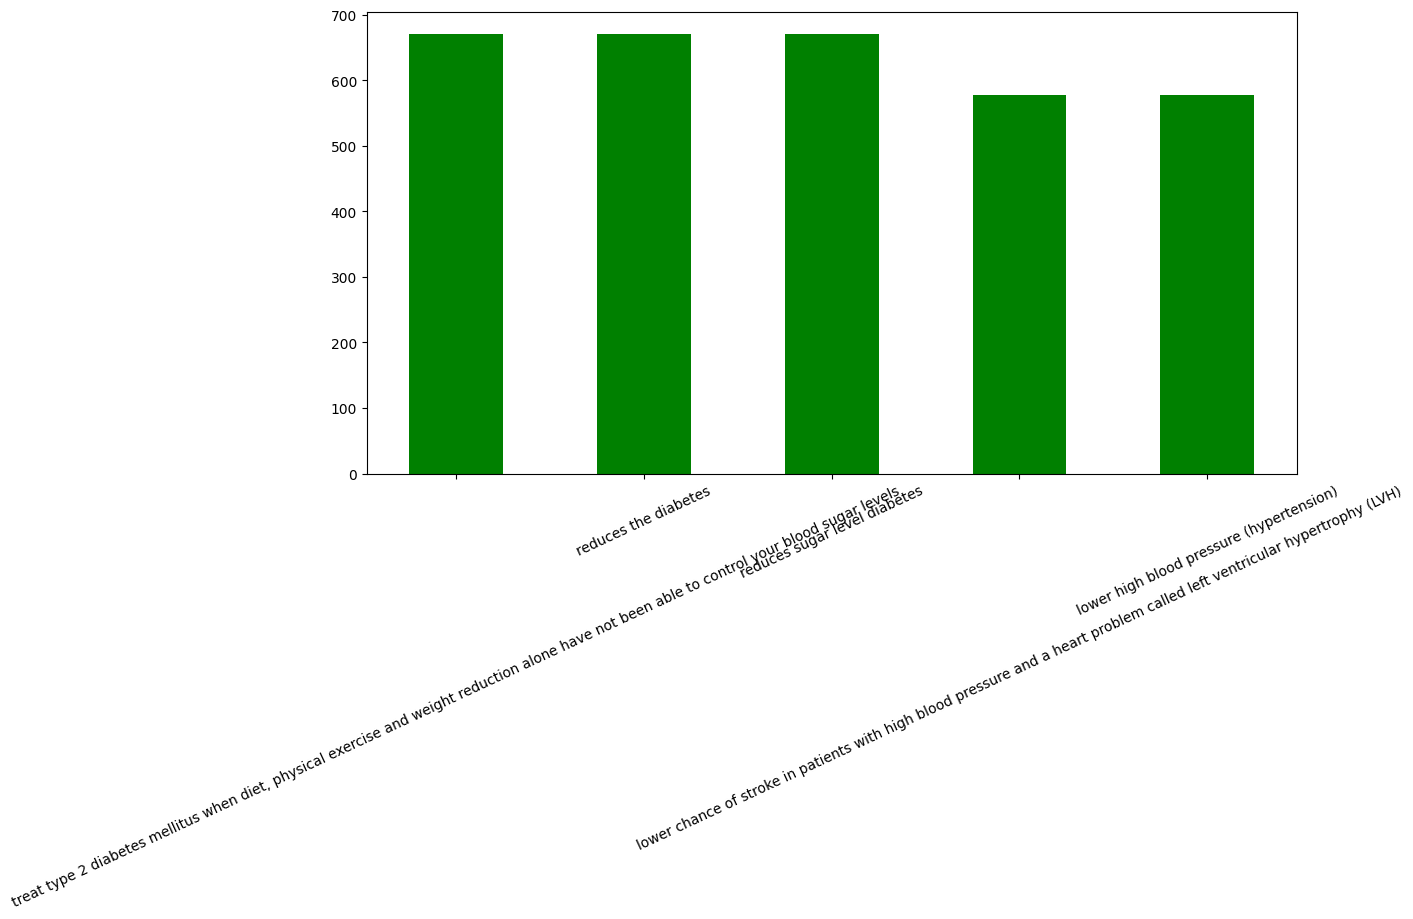

In [118]:
#Medicine Description: 
print(f'Dataset has {len(df.Description.unique())} unique Medicine Descriptions')
print(f'And the top 5 counts are :')
print(df.Description.value_counts().head(5))

count = df.Description.value_counts().head(5)
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.bar(count.index, count.values, width=0.5, color='green')
plt.xticks(rotation = 25)

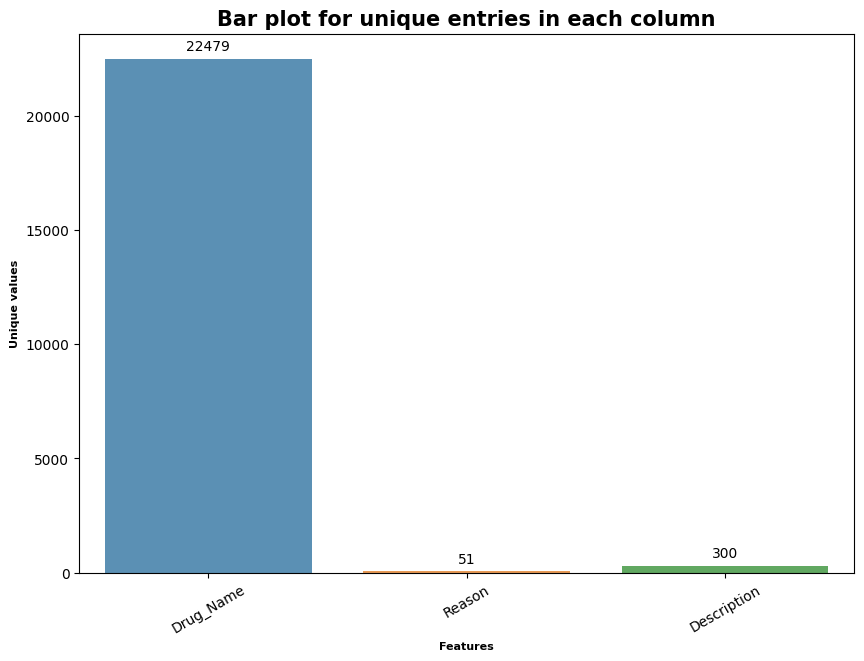

In [119]:
#Visualize the Bar plot for unique features in the Medicine Description data:
unique_df = pd.DataFrame()
unique_df['Features'] = df.columns
unique=[]
for x in df.columns:
    unique.append(df[x].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(10,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for y in splot.patches:
    splot.annotate(format(y.get_height(), '.0f'), (y.get_x() + y.get_width() / 2., y.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for unique entries in each column',weight='bold', size=15)
plt.ylabel('Unique values', size=8, weight='bold')
plt.xlabel('Features', size=8, weight='bold')
plt.xticks(rotation=30)
plt.show()

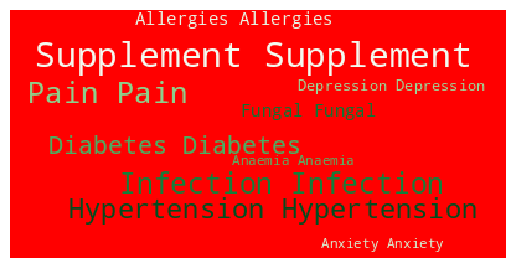

In [120]:
#A wordcloud for most common Reasons for medicines:
from wordcloud import ImageColorGenerator,WordCloud
text = " ".join(str(each) for each in df.Reason)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=10, colormap='Greens', background_color="Red").generate(text)

#Plotting the word cloud:
plt.imshow(wordcloud, interpolation='Nearest')
plt.axis("off")
plt.figure(1,figsize=(6, 6))
plt.show()

In [121]:
#Another datafile which includes rating of the medicines:
df1 = pd.read_excel('Ratings.xlsx')
df1.head()

,Short-form,Rating
0,S,4.8
1,R,4.7
2,D,4.5
3,C,4.3
4,B,4.1


In [126]:
df1 = df1.rename(columns={'Short-form':'form'})

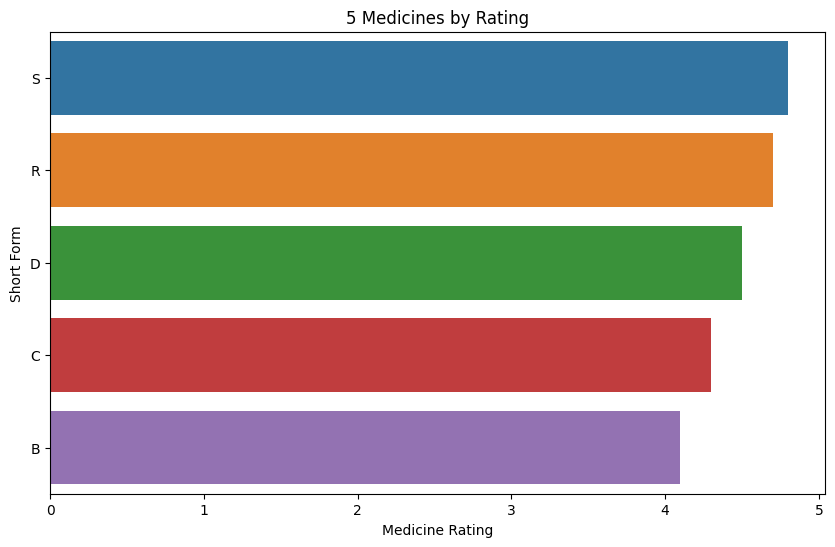

In [128]:
#The top 5 medicines used/prescribed to the patients:
top_medicine = df1.sort_values(by='Rating', ascending=False)[:5]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=top_medicine.form, x=top_medicine.Rating)
plt.xticks()
plt.xlabel('Medicine Rating')
plt.ylabel('Short Form')
plt.title('5 Medicines by Rating')
plt.show()

In [129]:
#Datafile of the companies that sell these medicines:
df2 = pd.read_excel('Company_Name.xlsx')
df2.head()

,S.No,Company_Name,NSE_Symbol,Rating,Industry
0,1,Sun Pharmaceutical Industries Ltd.,SUNPHARMA,S,Pharmaceuticals & Drugs
1,2,Dr. Reddys Laboratories Ltd.,DRREDDY,R,Pharmaceuticals & Drugs
2,3,Divis Laboratories Ltd.,DIVISLAB,D,Pharmaceuticals & Drugs
3,4,Cipla Ltd.,CIPLA,C,Pharmaceuticals & Drugs
4,5,Biocon Ltd.,BIOCON,B,Pharmaceuticals & Drugs


In [130]:
#The coloumns can be seen as:
df2.columns.tolist()

['S.No', 'Company_Name', 'NSE_Symbol', 'Rating', 'Industry']

In [131]:
#Modifying the datafile with including a serial number:
s = (df2.isna().sum()/df2.shape[0]*100)<50
df2_modified = df2[s.index[s].tolist()]
print (df2_modified.shape)
df2_modified.head()

(22481, 5)


,S.No,Company_Name,NSE_Symbol,Rating,Industry
0,1,Sun Pharmaceutical Industries Ltd.,SUNPHARMA,S,Pharmaceuticals & Drugs
1,2,Dr. Reddys Laboratories Ltd.,DRREDDY,R,Pharmaceuticals & Drugs
2,3,Divis Laboratories Ltd.,DIVISLAB,D,Pharmaceuticals & Drugs
3,4,Cipla Ltd.,CIPLA,C,Pharmaceuticals & Drugs
4,5,Biocon Ltd.,BIOCON,B,Pharmaceuticals & Drugs


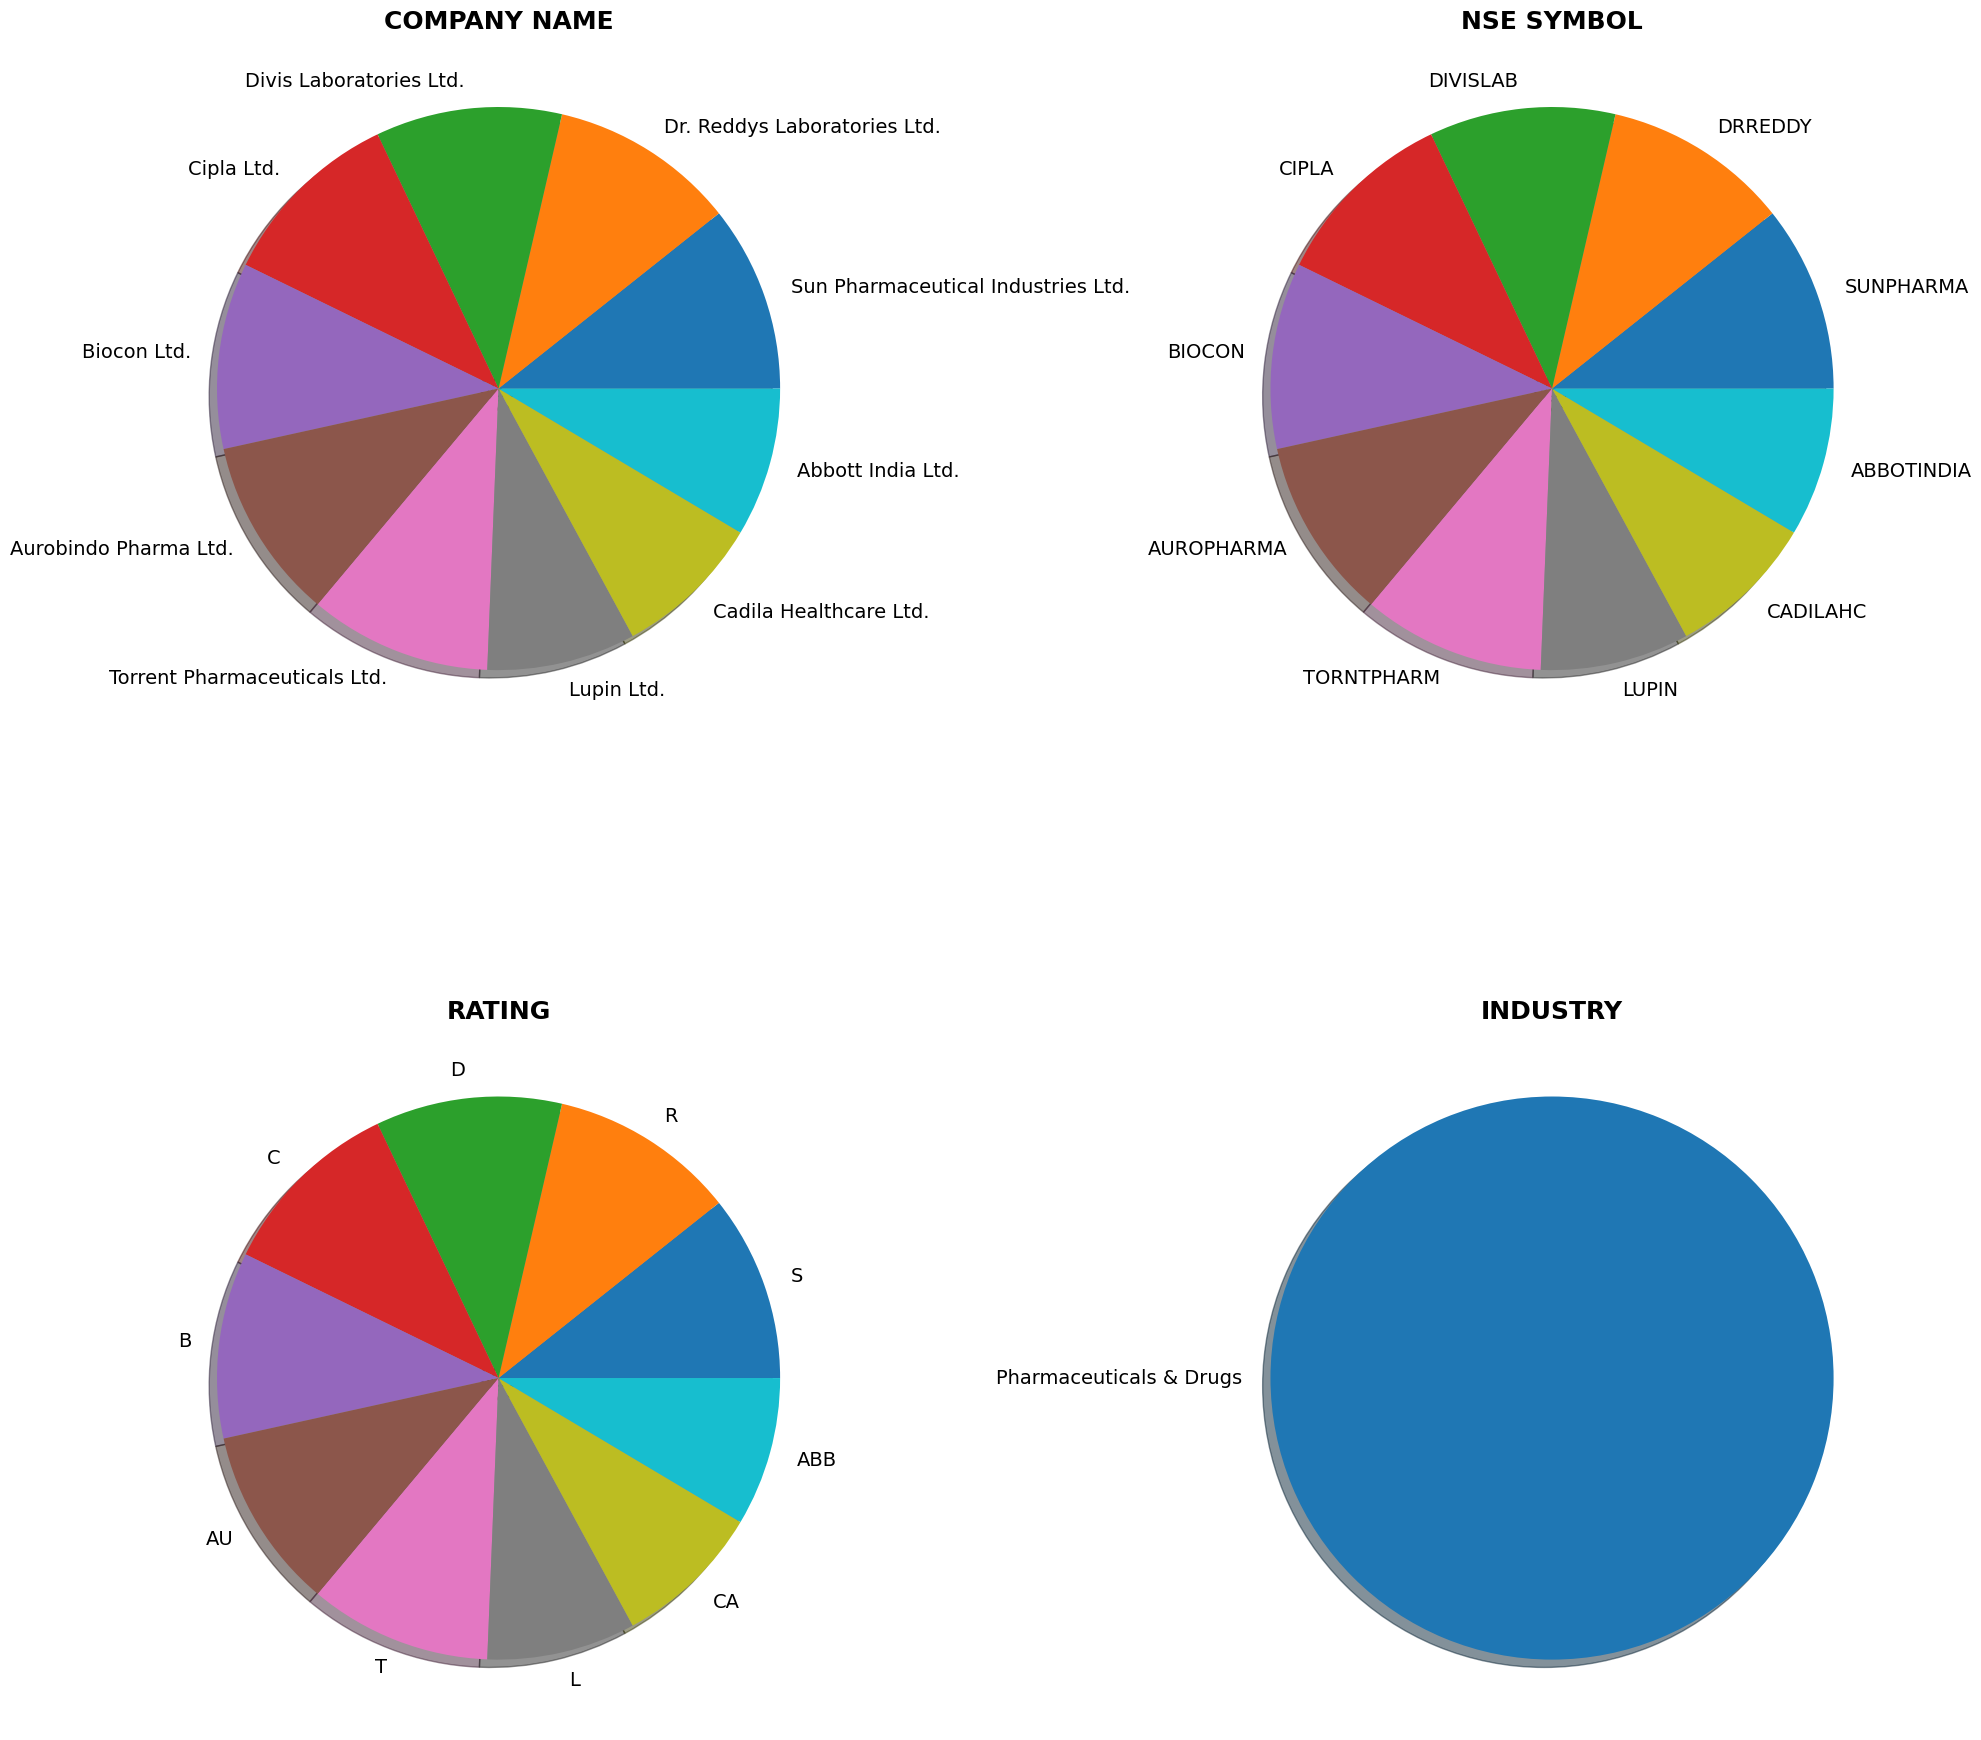

In [132]:
#Data Analysis of medicines wrt companies:
import math
plt.rcParams['font.size'] = 14
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for col, ax in zip(['Company_Name','NSE_Symbol','Rating', 'Industry'], ax.flat):
    dict_ = df2_modified[col].value_counts().head(10).to_dict()
    if ('Not Available' in dict_.keys()):
        dict_.pop('Not Available')
    labels = []
    for i in dict_.keys():
        i = i.split(' ')
        if (len(i) > 6):
            i[math.ceil(len(i)/2)-1] += '\n'
            labels.append(' '.join(i))
        else:
            labels.append(' '.join(i))
    ax.pie(x=list(dict_.values()), labels=labels, shadow=True, startangle=0)
    
    col = (' '.join(col.split('_'))).upper()
    ax.set_title(col, weight='bold', fontsize=18)
plt.tight_layout()
plt.show()

**Getting a list of medicines for a particular health issue:**

In [133]:
def get_medicine(x):
   dfn=df.loc[df['Reason'] == x]
   medicine=dfn['Drug_Name']
   return medicine

In [134]:
print(get_medicine('Diabetes').size)
arr=np.array(get_medicine('Diabetes'))

2013


In [135]:
print(arr)

["3D OHA Tablet 10'S" "3D OHA 1G Tablet 10'S" "3D Oha 2G Tablet 10'S" ...
 "Zyvana 2mg Tablet 10'SZyvana 1mg Tablet 10'S"
 "Zyvana M 1mg Tablet 10'SZyvana M 2mg Tablet 10'S"
 "Zyvana M2 Forte Tablet 10'S"]


In [136]:
m=df.Reason.unique()
dic=dict()

for i in m:
    dic[i]=get_medicine('Diabetes').size

In [137]:
meds = list(dic.keys())
nfmeds = list(dic.values())
  
fig = plt.figure(figsize = (100, 100))
plt.bar(meds,nfmeds, color ='maroon',
        width = 0.2)
plt.xlabel("Particular Disease")
plt.ylabel("No. of medicines")
plt.title("Medicine Database")
plt.show()

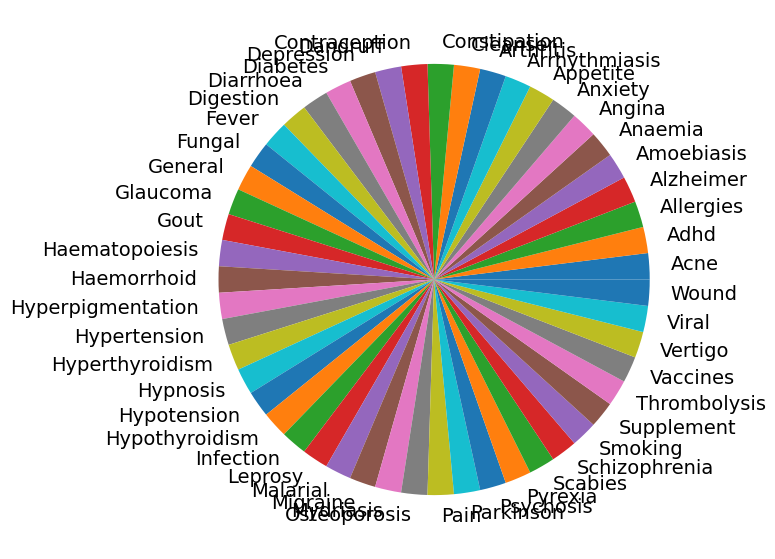

In [138]:
fig = plt.figure(figsize =(7, 7))
plt.pie(nfmeds, labels = meds)
plt.show()

In [139]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['Drug_Name'])
print(tfidf_matrix.shape)

(22481, 24038)


In [140]:
#Predicting the indices of the medicines according to health issue:
indices = pd.Series(df.index, index=df['Reason']).drop_duplicates()
print(indices)

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


def get_predictions(Reason, cosine_sim=cosine_sim):
    idx = indices[Reason]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores)
    sim_scores = sim_scores[1:11]
    drug_indices = [i[0] for i in sim_scores]

    return df['Reason'].iloc[drug_indices]

Reason
Acne         0
Acne         1
Acne         2
Acne         3
Acne         4
         ...  
Wound    22476
Wound    22477
Wound    22478
Wound    22479
Wound    22480
Length: 22481, dtype: int64


In [141]:
get_predictions('Viral')

1     Acne
2     Acne
3     Acne
4     Acne
5     Acne
6     Acne
7     Acne
8     Acne
9     Acne
10    Acne
Name: Reason, dtype: object

In [142]:
#The shape of our data that we are going to use now for Classification:
df.shape

(22481, 3)

In [143]:
df.head()

,Drug_Name,Reason,Description
0,A CN Gel(Topical) 20gmA CN Soap 75gm,Acne,Mild to moderate acne (spots)
1,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,Acne,A RET 0.025% is a prescription medicine that i...
2,ACGEL CL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
3,ACGEL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
4,Acleen 1% Lotion 25ml,Acne,treat the most severe form of acne (nodular ac...


**Naive-Bayes Classifier Training:**

In [144]:
#Model_Training and Fitting(Naive Bayes Classifier):
X = df['Reason']
Y = df['Drug_Name']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_train = TfidfTransformer().fit_transform(X_train)

clf = MultinomialNB().fit(X_train,Y_train)


In [147]:
#After train test split, the size of our test dataset:
print(X_train.shape)
print(X_test.shape)
X_test

(15736, 51)
(6745,)


16520          Pain
19199    Supplement
6529      Digestion
1035      Allergies
21541    Supplement
            ...    
15234          Pain
7317         Fungal
8008           Gout
17497       Pyrexia
4745       Diabetes
Name: Reason, Length: 6745, dtype: object

In [148]:
#Testing and confusion matrix:
Y_pred = clf.predict(vectorizer.transform(list(X_test)))

In [149]:
print(multilabel_confusion_matrix(list(Y_test), Y_pred))

[[[6.510e+03 2.350e+02]
  [0.000e+00 0.000e+00]]

 [[6.744e+03 0.000e+00]
  [1.000e+00 0.000e+00]]

 [[6.694e+03 5.100e+01]
  [0.000e+00 0.000e+00]]

 ...

 [[6.744e+03 0.000e+00]
  [1.000e+00 0.000e+00]]

 [[6.744e+03 0.000e+00]
  [1.000e+00 0.000e+00]]

 [[6.744e+03 0.000e+00]
  [1.000e+00 0.000e+00]]]


**Prediction Function and testing of Classifier:**

In [150]:
def Predict_Medicine(Health_issue,):
  pred = print(clf.predict(vectorizer.transform([Health_issue])))
  return pred


In [151]:
Predict_Medicine('Anxiety')

["ALP 0.5mg Tablet 10'SALP FT Tablet 10'SALP 0.25mg Tablet 10'SALP Ftd Tablet 10'S"]


In [152]:
Predict_Medicine('Anaemia')

["ACCEDE P 10mcg Tablet 15's"]


In [153]:
Predict_Medicine('Depression')

["AMNURING 25mg Tablet 10's"]


In [154]:
#The predicted medicines for a particular issue:
#As the data is randomized, so the predicted medicines are not the exact one but the purpose of the 
#predicted medicine is to cure the health issue.
#So our classifier is performing well

print("Health Issues: ", X_test[1:3])
print("Actual Medicine Prescribed: ", Y_test[1:3])
print("Predicted Medicine Prescribed: ", list(Y_pred[1:3]))

Health Issues:  19199    Supplement
6529      Digestion
Name: Reason, dtype: object
Actual Medicine Prescribed:  19199                                  EPI O2 Capsule 10'S
6529     Xymex Drops 30mlXymex Drops 15mlXymex Syrup 200ml
Name: Drug_Name, dtype: object
Predicted Medicine Prescribed:  ["2 B12 Capsule 15's", "Agna 25000 Capsule 10'SAgna 10000 Capsule 10'S"]


**Thank You for reading this**

